In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file and specify column names
data = pd.read_csv("/home/katana/Kanairo/C Programming/Hw1/montecarlo_data.csv", names=["N", "Average Absolute Error"], header=0)


# Group the data by 'N' and calculate the mean of 'Average Absolute Error'
mean_error = data.groupby('N')['Average Absolute Error'].mean().reset_index()

# Now, mean_error contains the average error for each N
print(mean_error)


          N  Average Absolute Error
0         2                1.344350
1         4                1.464858
2         8                1.412703
3        16                1.411028
4        32                1.425137
5        64                1.420604
6       128                1.400881
7       256                1.414715
8       512                1.418901
9      1024                1.410376
10     2048                1.411826
11     4096                1.413020
12     8192                1.414237
13    16384                1.412806
14    32768                1.413761
15    65536                1.413473
16   131072                1.413588
17   262144                1.413583
18   524288                1.413598
19  1048576                1.413651


A ≈ 0.00031973216650075137, B ≈ 0.34318637336915475


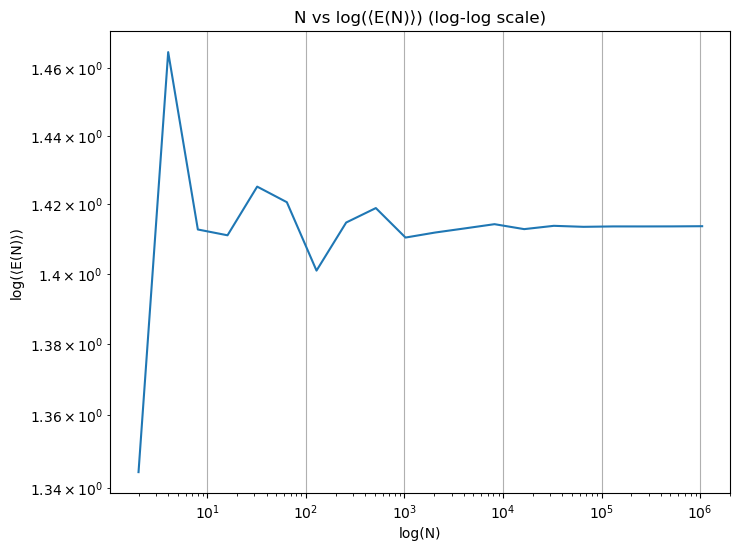

In [13]:

# Plot N vs log(⟨E(N)⟩) on a log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(mean_error['N'], mean_error['Average Absolute Error'])
plt.title("N vs log(⟨E(N)⟩) (log-log scale)")
plt.xlabel("log(N)")
plt.ylabel("log(⟨E(N)⟩)")
plt.grid()

# Perform linear regression to estimate A and B
log_N = np.log(mean_error['N'])
log_error = np.log(mean_error['Average Absolute Error'])

coefficients = np.polyfit(log_N, log_error, 1)
A = coefficients[0]
B = coefficients[1]

print(f"A ≈ {A}, B ≈ {B}")


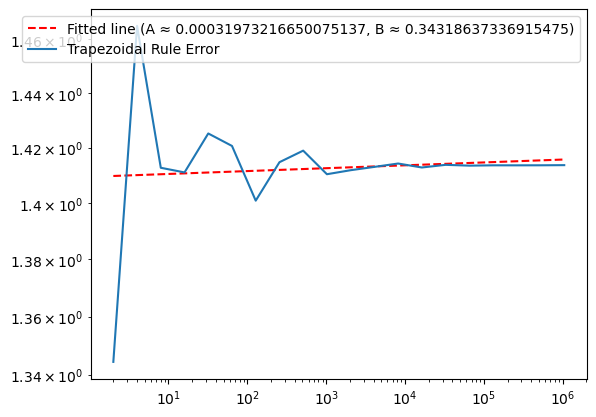

In [14]:
# Add the fitted line to the plot
plt.plot(mean_error['N'], np.exp(B) * mean_error['N']**A, 'r--', label=f'Fitted line (A ≈ {A}, B ≈ {B})')

# Load and plot the analogous N vs error data generated with the trapezoidal rule
trapezoidal_data = pd.read_csv("/home/katana/Kanairo/C Programming/Hw1/montecarlo_data.csv", names=["N", "Average Absolute Error"], header=0)
plt.loglog(trapezoidal_data['N'], trapezoidal_data['Average Absolute Error'], label='Trapezoidal Rule Error')

plt.legend()

plt.show()
